<a href="https://colab.research.google.com/github/Racsaanth05/ml/blob/main/ML_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entropy: 1.0
Gini Index: 0.5
Best Feature for Root Node: Feature1
Binned Data:    Feature1  Feature2 Label
0         0         2     A
1         0         1     A
2         1         1     B
3         1         0     B
4         2         3     A
5         2         3     A
6         3         0     B
7         3         2     B


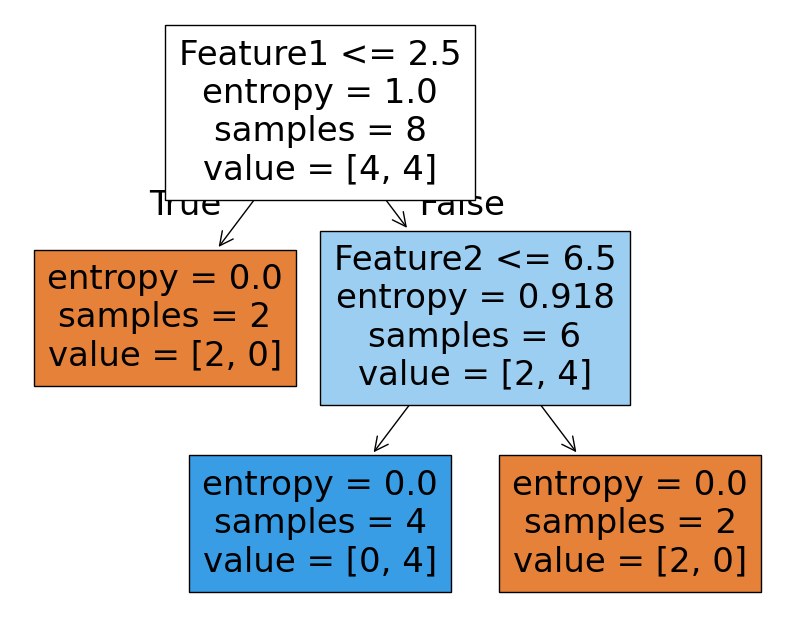

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

def calculate_entropy(data):
    labels = data.iloc[:, -1]
    label_counts = Counter(labels)
    total_samples = len(labels)
    entropy = -sum((count / total_samples) * np.log2(count / total_samples) for count in label_counts.values())
    return entropy

def calculate_gini(data):
    labels = data.iloc[:, -1]
    label_counts = Counter(labels)
    total_samples = len(labels)
    gini = 1 - sum((count / total_samples) ** 2 for count in label_counts.values())
    return gini

def equal_width_binning(data, num_bins=4):
    binned_data = pd.DataFrame()
    for column in data.columns[:-1]:
        binned_data[column] = pd.cut(data[column], bins=num_bins, labels=False)
    binned_data[data.columns[-1]] = data.iloc[:, -1]
    return binned_data

def best_feature(data):
    base_entropy = calculate_entropy(data)
    max_info_gain = -1
    best_feature = -1

    for column in data.columns[:-1]:
        values = data[column].unique()
        split_entropy = sum((len(data[data[column] == value]) / len(data)) * calculate_entropy(data[data[column] == value]) for value in values)
        info_gain = base_entropy - split_entropy

        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = column

    return best_feature

def build_decision_tree(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(X, y)
    return clf

def visualize_tree(clf, feature_names):
    plt.figure(figsize=(10, 8))
    plot_tree(clf, feature_names=feature_names, filled=True)
    plt.show()

data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8],
    'Feature2': [5, 3, 4, 2, 7, 8, 1, 6],
    'Label': ['A', 'A', 'B', 'B', 'A', 'A', 'B', 'B']
})

print("Entropy:", calculate_entropy(data))
print("Gini Index:", calculate_gini(data))
print("Best Feature for Root Node:", best_feature(data))
binned_data = equal_width_binning(data)
print("Binned Data:", binned_data)

clf = build_decision_tree(data)
visualize_tree(clf, data.columns[:-1])
